In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy import constants
import yaml

In [2]:
q_koordinate = np.array([4,4])
Q1_ladung = 1.0*constants.nano
Q1_koordinate = np.array([2,5])
Q2_ladung = 1.0*constants.nano
Q2_koordinate = np.array([7,5])

In [3]:
class PunktLadung():
    
    def __init__(self, koordinaten = [0,0], ladung = 0, punkt = q_koordinate):
        self.koordinaten = koordinaten
        self.ladung = ladung
        self.punkt = punkt
        
    def coulombkraft(self, ladung): # Berechnung der Coulombkraft mithilfe der Ladung und der Vektorlänge
        coulombkraft = (1/(4*np.pi*constants.epsilon_0)) * (ladung/np.square(np.linalg.norm((self.punkt - self.koordinaten)*constants.centi)))
        return coulombkraft
    
    def feldstärke(self, coulombkraft): # Multiplikation der Kraft mit dem Einheitsvektor, um Richtung darzustellen
        feldstärke = coulombkraft*(self.punkt - self.koordinaten)/np.linalg.norm(self.punkt - self.koordinaten)
        return feldstärke
    
    def __del__(self):
        if self.koordinaten != None:
            del(self.words)
        if self.koordinaten != None:
            del(self.koordinaten)

### Berechnung der Werte

In [4]:
Q1 = PunktLadung(Q1_koordinate, Q1_ladung)
Q1_coulombkraft = Q1.coulombkraft(Q1_ladung)
Q1_feldstärke = Q1.feldstärke(Q1_coulombkraft)

In [5]:
Q2 = PunktLadung(Q2_koordinate, Q2_ladung) 
Q2_coulombkraft = Q2.coulombkraft(Q2_ladung)
Q2_feldstärke = Q2.feldstärke(Q2_coulombkraft)

In [6]:
q_gesamtFeldstärke = Q1_feldstärke + Q2_feldstärke
q_gesamtFeldstärke_länge = np.linalg.norm(q_gesamtFeldstärke)

### Parameter zur Verschönerung und Plot

In [7]:
Dateiname2 = "Plot.yaml"
with open(Dateiname2, "r") as file:
    Daten2 = yaml.safe_load(file)

In [8]:
Skalierung = float(Daten2["Skalierung"])*np.power(10.0, -3.7)
Pfeilbreite = float(Daten2["Pfeilbreite"])
Kreisradius = float(Daten2["Kreisradius"])
q_farbe = Daten2["q_farbe"]
Q1_farbe = Daten2["Q1_farbe"]
Q2_farbe = Daten2["Q2_farbe"]

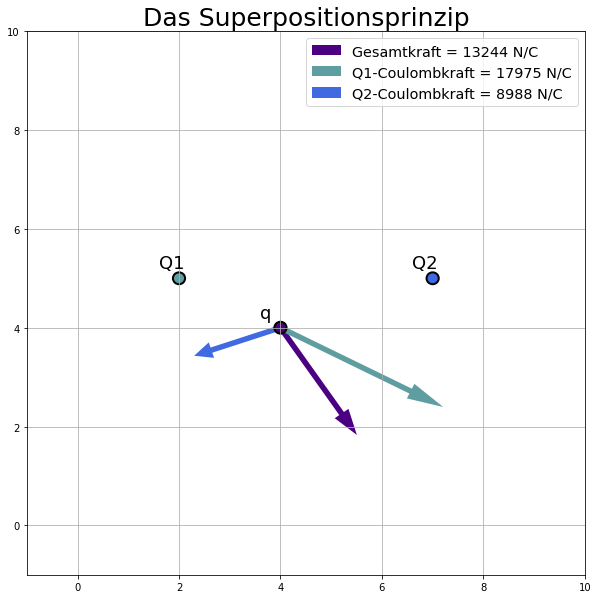

In [9]:
fig, ax = plt.subplots(figsize = (10, 10))

# Plotten der Vektorpfeile
# benötigte Parameter für die Pfeile (x-Koordinate, y-Koordinate, Länge in x-Richtung, Länge in y-Richtung, ...)
v_shape = patches.Arrow(q_koordinate[0], q_koordinate[1], q_gesamtFeldstärke[0]*Skalierung, q_gesamtFeldstärke[1]*Skalierung, width = Pfeilbreite, fc = q_farbe )
V1_shape = patches.Arrow(q_koordinate[0], q_koordinate[1], Q1_feldstärke[0]*Skalierung, Q1_feldstärke[1]*Skalierung, width = Pfeilbreite, fc = Q1_farbe )
V2_shape = patches.Arrow(q_koordinate[0], q_koordinate[1], Q2_feldstärke[0]*Skalierung, Q2_feldstärke[1]*Skalierung, width = Pfeilbreite, fc = Q2_farbe)
plt.gca().add_patch(v_shape)
plt.gca().add_patch(V1_shape)
plt.gca().add_patch(V2_shape)

# Und Erstellung der Legende
v_shape.set_label(f"Gesamtkraft = {round(q_gesamtFeldstärke_länge)} N/C")
V1_shape.set_label(f"Q1-Coulombkraft = {round(Q1_coulombkraft)} N/C")
V2_shape.set_label(f"Q2-Coulombkraft = {round(Q2_coulombkraft)} N/C")

# Plotten der Ladunkspunkte 
q_shape = patches.Circle((q_koordinate[0],q_koordinate[1]), radius = Kreisradius, lw = 2., fc = q_farbe , ec = "k"  , zorder = 1)
Q1_shape = patches.Circle((Q1_koordinate[0],Q1_koordinate[1]), radius = Kreisradius, lw = 2., fc = Q1_farbe, ec = "k" , zorder = 1)
Q2_shape = patches.Circle((Q2_koordinate[0],Q2_koordinate[1]), radius = Kreisradius, lw = 2., fc = Q2_farbe, ec = "k", zorder = 1)
plt.gca().add_patch(q_shape)
plt.gca().add_patch(Q1_shape)
plt.gca().add_patch(Q2_shape)

# Beschriftung der Ladungen
plt.text(q_koordinate[0] - 0.4 , q_koordinate[1] + 0.2,  "q", fontsize = 18)
plt.text(Q1_koordinate[0] - 0.4,  Q1_koordinate[1] + 0.2 , "Q1", fontsize = 18)
plt.text(Q2_koordinate[0] - 0.4,  Q2_koordinate[1] + 0.2  , "Q2", fontsize = 18)

ax.axis([-1, 10, -1, 10])
ax.grid()
ax.legend(fontsize = "x-large")

# Die Überschrift
ax.set_title("Das Superpositionsprinzip", fontsize = 25)
plt.show()